SLIC with K means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.io import imread, imsave
from skimage import color


In [ ]:
image = imread('/content/1.jpg')


In [ ]:
segments = slic(image, n_segments=100, compactness=10, sigma=1)

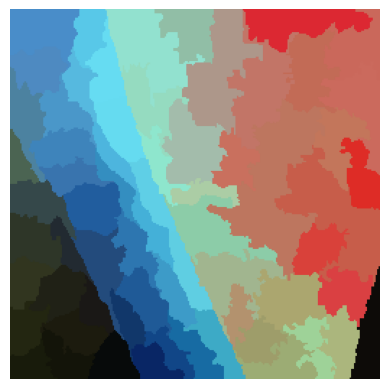

In [ ]:
segmented_image = color.label2rgb(segments, image, kind='avg')
imsave('segmented_image.jpg', segmented_image)
plt.imshow(segmented_image)
plt.axis('off')
plt.show()


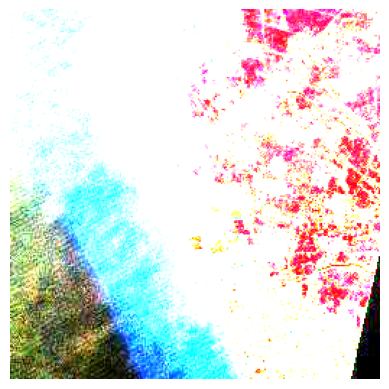

In [ ]:
reconstructed_images = []
for segment_label in np.unique(segments):
    mask = np.zeros_like(image)
    mask[segments == segment_label] = 1
    reconstructed_image = image * mask
    reconstructed_images.append(reconstructed_image)
fused_image = np.mean(reconstructed_images, axis=0)

# Save the fused image
imsave('fused_image.jpg', fused_image)

plt.imshow(fused_image)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from skimage.io import imread
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


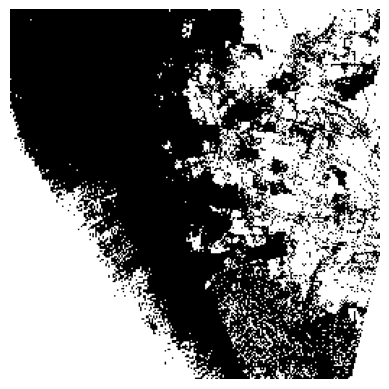

In [ ]:
import numpy as np
from skimage.io import imread
from sklearn.cluster import KMeans

def classify_pixels(image, n_clusters, threshold):
    # Flatten the image pixels for clustering
    data = image.reshape((-1, image.shape[-1]))

    # Perform fuzzy c-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    membership_values = kmeans.predict_proba(data)

    # Classify pixels based on membership values
    classified_image = np.zeros(image.shape[:2], dtype=int)

    for i in range(data.shape[0]):
        max_membership = np.max(membership_values[i])
        cluster_idx = np.argmax(membership_values[i])

        if max_membership > threshold:
            classified_image[i // image.shape[1], i % image.shape[1]] = cluster_idx + 1
        else:
            classified_image[i // image.shape[1], i % image.shape[1]] = 0

    return classified_image

# Example usage
image1 = imread('image1.jpg')
image2 = imread('image2.jpg')
n_clusters = 2
threshold = 0.5

classified_image = classify_pixels(image1, n_clusters, threshold)

# Display the classified image
imshow(classified_image, cmap='jet')



In [ ]:
def calculate_accuracy(segmented_image, ground_truth):
    # Flatten the segmented image and ground truth
    segmented_flat = segmented_image.flatten()
    ground_truth_flat = ground_truth.flatten()

    # Calculate accuracy using normalized root mean squared error (NRMSE)
    accuracy = 1 - normalized_root_mse(segmented_flat, ground_truth_flat)

    return accuracy
segmented_image = imread('/content/segmented_image.jpg')
ground_truth = imread('/content/1.jpg')

accuracy = calculate_accuracy(segmented_image, ground_truth)
print('Accuracy:', accuracy)

Accuracy: 0.7509062441141496


Quickshift with Kmeans and FCM

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from skimage.io import imread
import matplotlib.pyplot as plt

In [ ]:
from skimage.segmentation import quickshift
from skimage.io import imread,imsave
import matplotlib.pyplot as plt


In [ ]:
image = imread('/content/1.jpg')

In [ ]:
segments = quickshift(image, kernel_size=3, max_dist=6, ratio=0.5)

<ipython-input-13-debeeb9a856d>:1: UserWarning: Segmented.jpg is a low contrast image
  imsave('Segmented.jpg', segments)


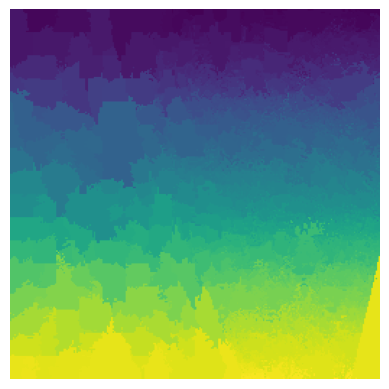

In [ ]:
imsave('Segmented.jpg', segments)
plt.imshow(segments)
plt.axis('off')
plt.show()

<ipython-input-15-a9684d56fb98>:10: UserWarning: fused_image.jpg is a low contrast image
  imsave('fused_image.jpg', fused_image)


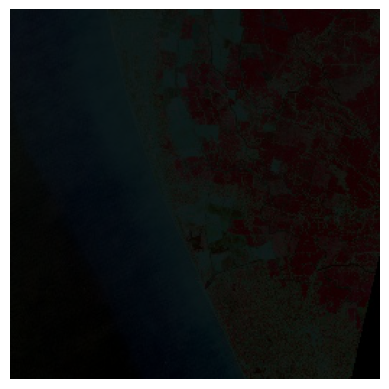

In [ ]:
reconstructed_images = []
for segment_label in np.unique(segments):
    mask = np.zeros_like(image)
    mask[segments == segment_label] = 1
    reconstructed_image = image * mask
    reconstructed_images.append(reconstructed_image)
fused_image = np.mean(reconstructed_images, axis=0)

# Save the fused image
imsave('fused_image.jpg', fused_image)

plt.imshow(fused_image)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from skimage.io import imread
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


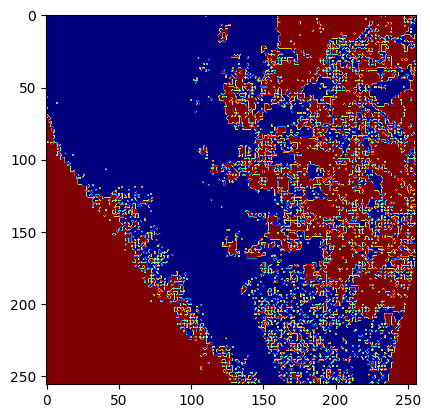

In [ ]:
import numpy as np
from skimage.io import imread
from sklearn.cluster import KMeans

def classify_pixels(image, n_clusters, threshold):
    # Flatten the image pixels for clustering
    data = image.reshape((-1, image.shape[-1]))

    # Perform fuzzy c-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    membership_values = kmeans.predict(data)

    # Classify pixels based on membership values
    classified_image = np.zeros(image.shape[:2], dtype=int)

    for i in range(data.shape[0]):
        max_membership = np.max(membership_values[i])
        cluster_idx = np.argmax(membership_values[i])

        if max_membership > threshold:
            classified_image[i // image.shape[1], i % image.shape[1]] = cluster_idx + 1
        else:
            classified_image[i // image.shape[1], i % image.shape[1]] = 0

    return classified_image

# Example usage
image1 = imread('/content/1.jpg')
image2 = imread('/content/2.jpg')
n_clusters = 2
threshold = 0.5

classified_image = classify_pixels(image1, n_clusters, threshold)

# Display the classified image
plt.imshow(classified_image, cmap='jet')
plt.show()


In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=dc6dc2b56beaa39466f78e3d3329d3a02d3c96cbe2a9a99f8feadde5291c9aea
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
from skimage import io, color
import skfuzzy as fuzz

In [ ]:
def fuzzy_cmeans_change_detection(image1, image2, num_clusters, fuzziness):
    # Load and convert images to grayscale
    img1 = color.rgb2gray(io.imread(image1))
    img2 = color.rgb2gray(io.imread(image2))

    # Flatten images into 1D arrays
    img1_flat = img1.reshape(-1)
    img2_flat = img2.reshape(-1)

    # Concatenate the two image arrays
    data = np.column_stack((img1_flat, img2_flat))

    # Perform Fuzzy C-Means clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data.T, num_clusters, fuzziness, error=0.005, maxiter=1000)

    # Calculate the change map
    change_map = np.argmax(u, axis=0).reshape(img1.shape)

    return change_map

# Example usage
image1_path = '/content/1.jpg'  # Replace with the path to your first image
image2_path = '/content/fused_image.jpg'  # Replace with the path to your second image
num_clusters = 2            # Number of clusters (change and non-change)
fuzziness = 2               # Fuzziness parameter

change_map = fuzzy_cmeans_change_detection(image1_path, image2_path, num_clusters, fuzziness)

# Save the change map as an image
io.imsave('change_map1.jpg', change_map)

<ipython-input-17-1ae393afd284>:31: UserWarning: change_map1.jpg is a low contrast image
  io.imsave('change_map1.jpg', change_map)
